In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from time import time
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import *

In [2]:
fred_md = pd.read_csv("data/Fred_MD_Current.csv")
fred_md.drop(0,axis=0, inplace=True) #Dropping the first row because it contains the transfotmation values. For this data look at fred_md_metadata.tcode.
fred_md.set_index("sasdate", inplace=True)
fred_md_metadata = pd.read_csv("data/FRED-MD_Metadata.csv", encoding='iso-8859-1')
fred_md.index = pd.to_datetime(fred_md.index)
fred_md.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5528,24.3936,23.1231,32.5925,20.0130,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [3]:
fred_md_metadata.head()

,id,tcode,fred,description,gsi,gsi:description,group
0,1,5,RPI,Real Personal Income,M_14386177,PI,1
1,2,5,W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,1
2,3,5,DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,4
3,4,5,CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,4
4,5,5,RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,4


In [4]:
fred_md_metadata.loc[fred_md_metadata["fred"] == "EXSZUSx"]

,id,tcode,fred,description,gsi,gsi:description,group
95,102,5,EXSZUSx,Switzerland / U.S. Foreign Exchange Rate,M_110154768,Ex rate: Switz,6


### Unemployment Rate and the Strength of the U.S. Dollar Worldwide

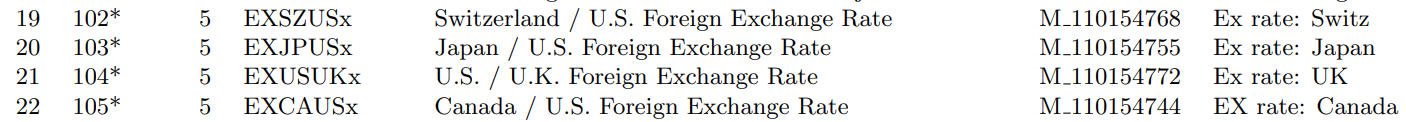
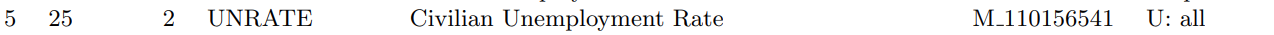

In [5]:
# Pulling the columns to be used
urate_dollar_df = fred_md[["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"]]
frequency = pd.infer_freq(fred_md.index)
urate_dollar_df.index = pd.DatetimeIndex(fred_md.index, freq=frequency)
urate_dollar_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,4.3122,359.8417,2.8065,0.9671,6.0
1959-02-01,4.3133,359.8417,2.8093,0.9748,5.9
1959-03-01,4.3228,359.8417,2.8127,0.9698,5.6
1959-04-01,4.3226,359.8417,2.8165,0.9636,5.2
1959-05-01,4.3228,359.8417,2.8145,0.9630,5.1


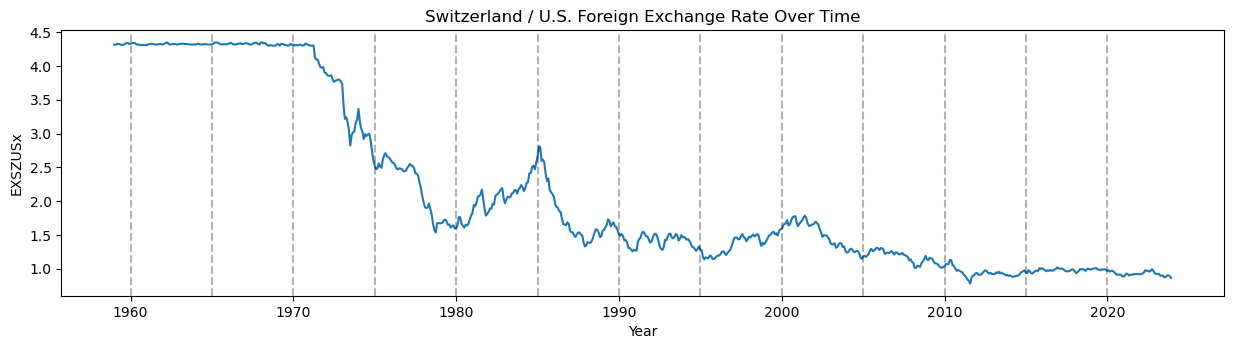

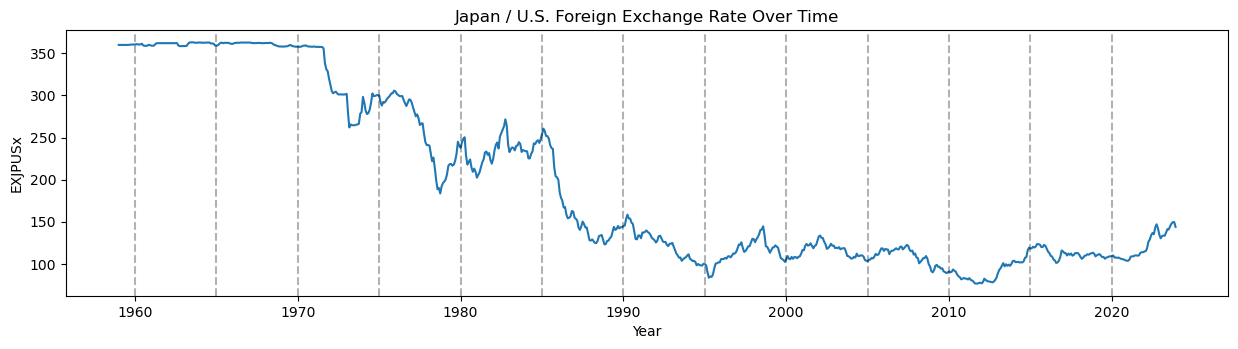

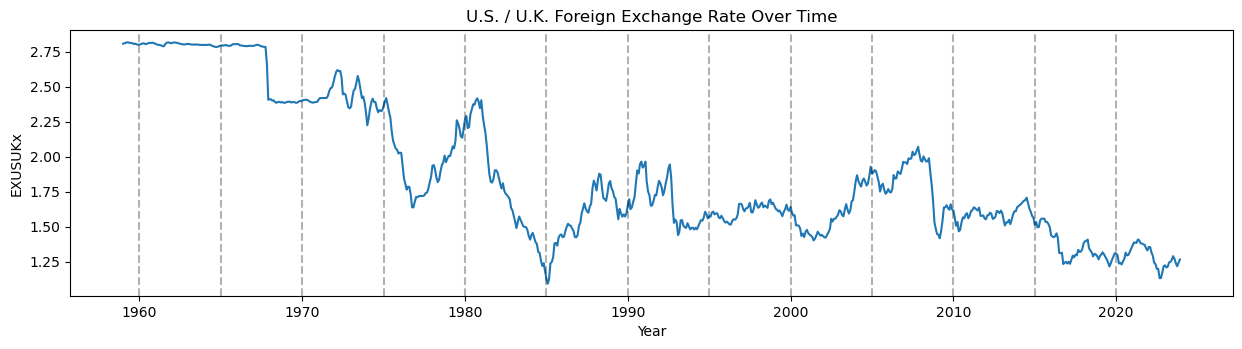

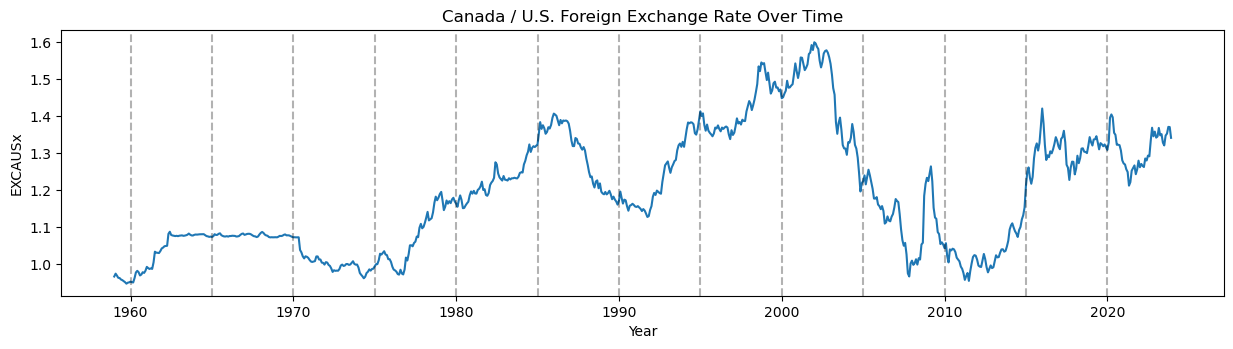

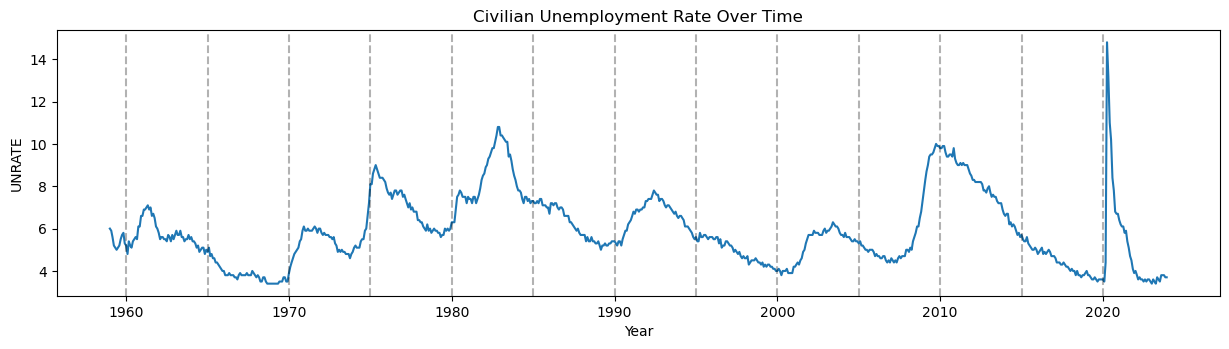

In [6]:
count = 1
for column in urate_dollar_df.columns:
    title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == column, "description"].values[0]
    plt.figure(figsize=(15,20))
    plt.subplot(len(urate_dollar_df.columns), 1, count)
    plt.plot(urate_dollar_df[column])
    plt.title(f"{title_} Over Time")
    plt.xlabel("Year")
    plt.ylabel(f"{column}")
    for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)
    count += 1

__Takeaways From The Plots:__

1. There don't seem to be any seasonal patterns in any of these measures.
2. In terms of the relationship between the U.S. dollar and Japanese, English, and Swiss currencies, the U.S. dollar seemed to have been considerably stronger until the 1970s. Since then, the relationships have fluctuated -- perhaps because the U.S. began importing more goods. However, it should still be noted that the U.S. dollar has been consistently stronger than these other currencies.
3. There is a major spike in unemployment in 2020 due to COVID-19; it will be interesting to see how the various Neural Networks react to this spike.

### CNN

In [7]:
# Pre-processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_np = scaler.fit_transform(urate_dollar_df.to_numpy())
scaled_df = pd.DataFrame(scaled_np, columns = ["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"])
scaled_df.index = urate_dollar_df.index
scaled_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,1.778506,1.626809,1.877341,-1.414157,0.054052
1959-02-01,1.779390,1.626809,1.882991,-1.366510,-0.005413
1959-03-01,1.787025,1.626809,1.889852,-1.397450,-0.183806
1959-04-01,1.786864,1.626809,1.897519,-1.435815,-0.421664
1959-05-01,1.787025,1.626809,1.893484,-1.439528,-0.481129


In [8]:
# Function from https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=7EViSFyntz9j
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [167]:
cnn_x_sz, cnn_y_sz = df_to_X_y(scaled_df[["EXSZUSx", "UNRATE"]], 3)
cnn_x_jp, cnn_y_jp = df_to_X_y(scaled_df[["EXJPUSx", "UNRATE"]], 3)
cnn_x_uk, cnn_y_uk = df_to_X_y(scaled_df[["EXUSUKx", "UNRATE"]], 3)
cnn_x_ca, cnn_y_ca = df_to_X_y(scaled_df[["EXCAUSx", "UNRATE"]], 3)
cnn_x_ca.shape

(777, 3, 2)

In [10]:
TRAIN = 499
VAL = 650

x_sz_train, x_sz_val, x_sz_test = cnn_x_sz[:TRAIN], cnn_x_sz[TRAIN:VAL], cnn_x_sz[VAL:]
x_jp_train, x_jp_val, x_jp_test = cnn_x_jp[:TRAIN], cnn_x_jp[TRAIN:VAL], cnn_x_jp[VAL:]
x_uk_train, x_uk_val, x_uk_test = cnn_x_uk[:TRAIN], cnn_x_uk[TRAIN:VAL], cnn_x_uk[VAL:]
x_ca_train, x_ca_val, x_ca_test = cnn_x_ca[:TRAIN], cnn_x_ca[TRAIN:VAL], cnn_x_ca[VAL:]

y_sz_train, y_sz_val, y_sz_test = cnn_y_sz[:TRAIN], cnn_y_sz[TRAIN:VAL], cnn_y_sz[VAL:]
y_jp_train, y_jp_val, y_jp_test = cnn_y_jp[:TRAIN], cnn_y_jp[TRAIN:VAL], cnn_y_jp[VAL:]
y_uk_train, y_uk_val, y_uk_test = cnn_y_uk[:TRAIN], cnn_y_uk[TRAIN:VAL], cnn_y_uk[VAL:]
y_ca_train, y_ca_val, y_ca_test = cnn_y_ca[:TRAIN], cnn_y_ca[TRAIN:VAL], cnn_y_ca[VAL:]

In [36]:
def create_cnn():
    CNN = models.Sequential()
    CNN.add(InputLayer((3, 2)))
    CNN.add(Conv1D(64, kernel_size = 2, activation = "tanh"))
    CNN.add(Flatten())
    CNN.add(Dense(1, "linear"))
    CNN.compile(optimizer='adam', loss='mse')
    return CNN

cnn_sz = create_cnn()
cnn_jp = create_cnn()
cnn_uk = create_cnn()
cnn_ca = create_cnn()


In [37]:
cnn_sz.fit(x_sz_train, y_sz_train, validation_data = (x_sz_val, y_sz_val),epochs=15)
print("SZ done")
cnn_jp.fit(x_jp_train, y_jp_train, validation_data = (x_jp_val, y_jp_val),epochs=15)
print("JP done")
cnn_uk.fit(x_uk_train, y_uk_train, validation_data = (x_uk_val, y_uk_val),epochs=15)
print("UK done")
cnn_ca.fit(x_ca_train, y_ca_train, validation_data = (x_ca_val, y_ca_val),epochs=15)
print("CA done")

Epoch 1/15
16/16 [==============================] - 2s 26ms/step - loss: 1.4705 - val_loss: 0.5305
Epoch 2/15
16/16 [==============================] - 0s 7ms/step - loss: 0.4915 - val_loss: 0.3185
Epoch 3/15
16/16 [==============================] - 0s 7ms/step - loss: 0.1282 - val_loss: 0.1371
Epoch 4/15
16/16 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0409
Epoch 5/15
16/16 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0093
Epoch 6/15
16/16 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0025
Epoch 7/15
16/16 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 9/15
16/16 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 10/15
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 11/15
16/16 

In [38]:
sz_preds = cnn_sz.predict(x_sz_test)
jp_preds = cnn_jp.predict(x_jp_test)
uk_preds = cnn_uk.predict(x_uk_test)
ca_preds = cnn_ca.predict(x_ca_test)

4/4 [==============================] - 0s 6ms/step


In [194]:
preds_dict = {
    "sz_preds":sz_preds.reshape(1,-1)[0],
    "jp_preds":jp_preds.reshape(1,-1)[0],
    "uk_preds":uk_preds.reshape(1,-1)[0],
    "ca_preds":ca_preds.reshape(1,-1)[0],
    "urate":scaled_np[VAL+3:,-1].reshape(1,-1)[0],
}

unscaled_preds_np = scaler.inverse_transform(pd.DataFrame(preds_dict).to_numpy())
unscaled_preds_df = pd.DataFrame(unscaled_preds_np, columns = ["EXSZUSx_preds", "EXJPUSx_preds", "EXUSUKx_preds", "EXCAUSx_preds", "UNRATE"])

In [195]:
unscaled_preds_df.index = urate_dollar_df.index[VAL+3:]
unscaled_preds_df.head()

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-06-01,0.915272,96.135425,1.509366,1.022762,7.5
2013-07-01,0.930028,98.276694,1.519647,1.023850,7.3
2013-08-01,0.927069,96.642559,1.517907,1.033829,7.2
2013-09-01,0.935810,97.809475,1.520094,1.038269,7.2
2013-10-01,0.909959,96.411466,1.540611,1.038059,7.2


In [196]:
unscaled_preds_df

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-06-01,0.915272,96.135425,1.509366,1.022762,7.5
2013-07-01,0.930028,98.276694,1.519647,1.023850,7.3
2013-08-01,0.927069,96.642559,1.517907,1.033829,7.2
2013-09-01,0.935810,97.809475,1.520094,1.038269,7.2
2013-10-01,0.909959,96.411466,1.540611,1.038059,7.2
...,...,...,...,...,...
2023-08-01,0.957590,144.071975,1.315684,1.332983,3.8
2023-09-01,0.914821,143.862743,1.317610,1.331286,3.8
2023-10-01,0.894778,146.269477,1.305098,1.348503,3.8


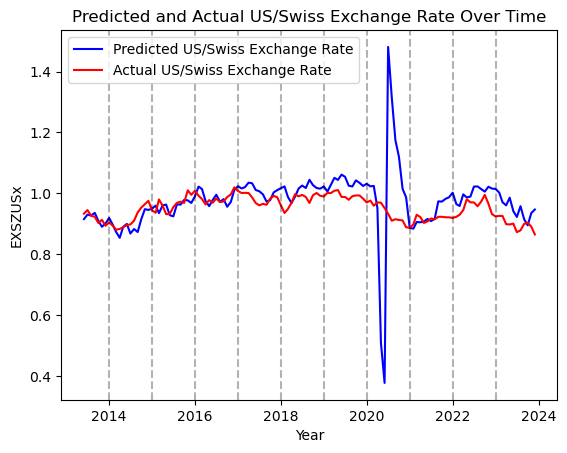

In [197]:
plt.plot(unscaled_preds_df["EXSZUSx_preds"], color = "blue", label = "Predicted US/Swiss Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+3:], color = "red", label = "Actual US/Swiss Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/Swiss Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

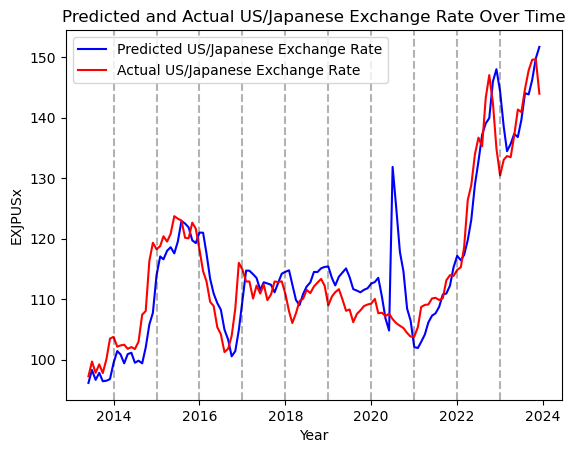

In [198]:
plt.plot(unscaled_preds_df["EXJPUSx_preds"], color = "blue", label = "Predicted US/Japanese Exchange Rate")
plt.plot(urate_dollar_df["EXJPUSx"][VAL+3:], color = "red", label = "Actual US/Japanese Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXJPUSx")
plt.title("Predicted and Actual US/Japanese Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

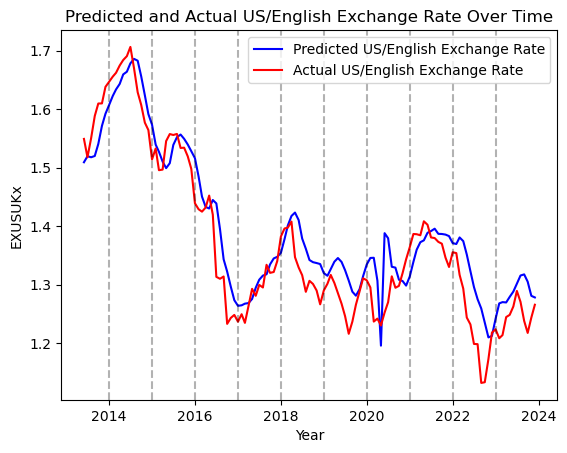

In [199]:
plt.plot(unscaled_preds_df["EXUSUKx_preds"], color = "blue", label = "Predicted US/English Exchange Rate")
plt.plot(urate_dollar_df["EXUSUKx"][VAL+3:], color = "red", label = "Actual US/English Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXUSUKx")
plt.title("Predicted and Actual US/English Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

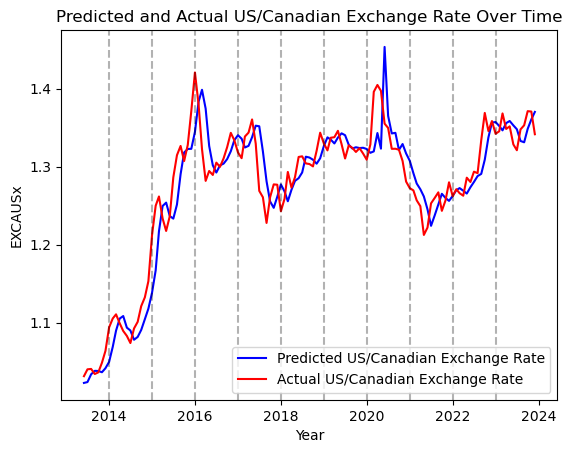

In [202]:
plt.plot(unscaled_preds_df["EXCAUSx_preds"], color = "blue", label = "Predicted US/Canadian Exchange Rate")
plt.plot(urate_dollar_df["EXCAUSx"][VAL+3:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXCAUSx")
plt.title("Predicted and Actual US/Canadian Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

__Predicting Exchange Rates Without Unemplyment Rate__

In [168]:
def df_to_X_y2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[r] for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

sz_rate_x, sz_rate_y = df_to_X_y2(fred_md["EXSZUSx"], 3)
jp_rate_x, jp_rate_y = df_to_X_y2(fred_md["EXJPUSx"], 3)
uk_rate_x, uk_rate_y = df_to_X_y2(fred_md["EXUSUKx"], 3)
ca_rate_x, ca_rate_y = df_to_X_y2(fred_md["EXCAUSx"], 3)

In [169]:
x_sz_train2, x_sz_val2, x_sz_test2 = sz_rate_x[:TRAIN], sz_rate_x[TRAIN:VAL], sz_rate_x[VAL:]
x_jp_train2, x_jp_val2, x_jp_test2 = jp_rate_x[:TRAIN], jp_rate_x[TRAIN:VAL], jp_rate_x[VAL:]
x_uk_train2, x_uk_val2, x_uk_test2 = uk_rate_x[:TRAIN], uk_rate_x[TRAIN:VAL], uk_rate_x[VAL:]
x_ca_train2, x_ca_val2, x_ca_test2 = ca_rate_x[:TRAIN], ca_rate_x[TRAIN:VAL], ca_rate_x[VAL:]

y_sz_train2, y_sz_val2, y_sz_test2 = sz_rate_y[:TRAIN], sz_rate_y[TRAIN:VAL], sz_rate_y[VAL:]
y_jp_train2, y_jp_val2, y_jp_test2 = jp_rate_y[:TRAIN], jp_rate_y[TRAIN:VAL], jp_rate_y[VAL:]
y_uk_train2, y_uk_val2, y_uk_test2 = uk_rate_y[:TRAIN], uk_rate_y[TRAIN:VAL], uk_rate_y[VAL:]
y_ca_train2, y_ca_val2, y_ca_test2 = ca_rate_y[:TRAIN], ca_rate_y[TRAIN:VAL], ca_rate_y[VAL:]

In [172]:
def create_cnn2():
    CNN = models.Sequential()
    CNN.add(InputLayer((3, 1)))
    CNN.add(Conv1D(64, kernel_size = 3, activation = "tanh"))
    CNN.add(Flatten())
    CNN.add(Dense(8, "relu"))
    CNN.add(Dense(4, "relu"))
    CNN.add(Dense(1, "linear"))
    CNN.compile(optimizer='adam', loss='mse')
    return CNN

cnn_sz2 = create_cnn2()
cnn_jp2 = create_cnn2()
cnn_uk2 = create_cnn2()
cnn_ca2 = create_cnn2()

In [173]:
cnn_sz2.fit(x_sz_train2, y_sz_train2, validation_data = (x_sz_val2, y_sz_val2),epochs=25)
print("SZ done")
cnn_jp2.fit(x_jp_train2, y_jp_train2, validation_data = (x_jp_val2, y_jp_val2),epochs=25)
print("JP done")
cnn_uk2.fit(x_uk_train2, y_uk_train2, validation_data = (x_uk_val2, y_uk_val2),epochs=25)
print("UK done")
cnn_ca2.fit(x_ca_train2, y_ca_train2, validation_data = (x_ca_val2, y_ca_val2),epochs=25)
print("CA done")

Epoch 1/25
16/16 [==============================] - 2s 24ms/step - loss: 2.9444 - val_loss: 0.0882
Epoch 2/25
16/16 [==============================] - 0s 8ms/step - loss: 0.3156 - val_loss: 0.3582
Epoch 3/25
16/16 [==============================] - 0s 8ms/step - loss: 0.1741 - val_loss: 0.0647
Epoch 4/25
16/16 [==============================] - 0s 8ms/step - loss: 0.1237 - val_loss: 0.1139
Epoch 5/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0870 - val_loss: 0.0536
Epoch 6/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0644 - val_loss: 0.0428
Epoch 7/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0482 - val_loss: 0.0232
Epoch 8/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0367 - val_loss: 0.0145
Epoch 9/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0287 - val_loss: 0.0078
Epoch 10/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0223 - val_loss: 0.0056
Epoch 11/25
16/16 

In [174]:
sz_preds2 = cnn_sz2.predict(x_sz_test2)
jp_preds2 = cnn_jp2.predict(x_jp_test2)
uk_preds2 = cnn_uk2.predict(x_uk_test2)
ca_preds2 = cnn_ca2.predict(x_ca_test2)

4/4 [==============================] - 0s 4ms/step


In [179]:
def create_LSTM():
    lstm = models.Sequential()
    lstm.add(InputLayer((3, 1)))
    lstm.add(LSTM(64))
    lstm.add(Dense(4, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

In [180]:
lstm_sz = create_LSTM()
lstm_sz.fit(x_sz_train2, y_sz_train2, validation_data = (x_sz_val2, y_sz_val2),epochs=15)
print("SZ done")

Epoch 1/15
16/16 [==============================] - 7s 93ms/step - loss: 7.3816 - val_loss: 1.0283
Epoch 2/15
16/16 [==============================] - 0s 12ms/step - loss: 5.0738 - val_loss: 0.5003
Epoch 3/15
16/16 [==============================] - 0s 11ms/step - loss: 2.3858 - val_loss: 0.0409
Epoch 4/15
16/16 [==============================] - 0s 12ms/step - loss: 0.4574 - val_loss: 0.1638
Epoch 5/15
16/16 [==============================] - 0s 12ms/step - loss: 0.1901 - val_loss: 0.1860
Epoch 6/15
16/16 [==============================] - 0s 12ms/step - loss: 0.1245 - val_loss: 0.0523
Epoch 7/15
16/16 [==============================] - 0s 11ms/step - loss: 0.0827 - val_loss: 0.0331
Epoch 8/15
16/16 [==============================] - 0s 12ms/step - loss: 0.0547 - val_loss: 0.0207
Epoch 9/15
16/16 [==============================] - 0s 12ms/step - loss: 0.0375 - val_loss: 0.0102
Epoch 10/15
16/16 [==============================] - 0s 11ms/step - loss: 0.0270 - val_loss: 0.0051
Epoch 11/

In [191]:
sz_lstm_preds = lstm_sz.predict(x_sz_test2)

4/4 [==============================] - 0s 4ms/step


In [192]:
sz_lstm_preds = pd.Series(sz_lstm_preds.reshape(1,-1)[0])
sz_lstm_preds.index = urate_dollar_df.index[VAL+3:]

In [193]:
sz_lstm_preds

sasdate
2013-06-01    0.909725
2013-07-01    0.907774
2013-08-01    0.910219
2013-09-01    0.901518
2013-10-01    0.899522
                ...   
2023-08-01    0.863015
2023-09-01    0.856123
2023-10-01    0.850969
2023-11-01    0.860883
2023-12-01    0.868066
Freq: MS, Length: 127, dtype: float32

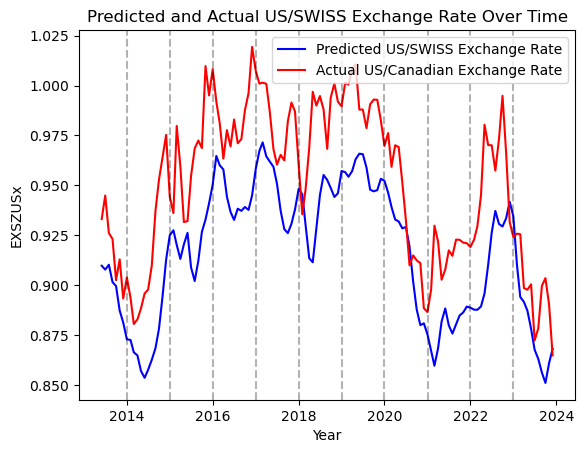

In [204]:
plt.plot(sz_lstm_preds, color = "blue", label = "Predicted US/SWISS Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+3:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/SWISS Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [238]:
def create_LSTM2():
    lstm = models.Sequential()
    lstm.add(InputLayer((3, 2)))
    lstm.add(LSTM(64, return_sequences=True))
    lstm.add(LSTM(32))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

lstm_sz2 = create_LSTM2()
lstm_jp2 = create_LSTM2()
lstm_uk2 = create_LSTM2()
lstm_ca2 = create_LSTM2()

In [239]:
lstm_sz2.fit(x_sz_train, y_sz_train, validation_data = (x_sz_val, y_sz_val),epochs=45)
print("SZ done")
lstm_jp2.fit(x_jp_train, y_jp_train, validation_data = (x_jp_val, y_jp_val),epochs=45)
print("JP done")
lstm_uk2.fit(x_uk_train, y_uk_train, validation_data = (x_uk_val, y_uk_val),epochs=45)
print("UK done")
lstm_ca2.fit(x_ca_train, y_ca_train, validation_data = (x_ca_val, y_ca_val),epochs=45)
print("CA done")

Epoch 1/45
16/16 [==============================] - 12s 157ms/step - loss: 0.9882 - val_loss: 0.4969
Epoch 2/45
16/16 [==============================] - 0s 16ms/step - loss: 0.4140 - val_loss: 0.4283
Epoch 3/45
16/16 [==============================] - 0s 15ms/step - loss: 0.1393 - val_loss: 0.2377
Epoch 4/45
16/16 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0.1080
Epoch 5/45
16/16 [==============================] - 0s 17ms/step - loss: 0.0296 - val_loss: 0.0506
Epoch 6/45
16/16 [==============================] - 0s 17ms/step - loss: 0.0187 - val_loss: 0.0431
Epoch 7/45
16/16 [==============================] - 0s 17ms/step - loss: 0.0181 - val_loss: 0.0437
Epoch 8/45
16/16 [==============================] - 0s 18ms/step - loss: 0.0191 - val_loss: 0.0449
Epoch 9/45
16/16 [==============================] - 0s 20ms/step - loss: 0.0179 - val_loss: 0.0382
Epoch 10/45
16/16 [==============================] - 0s 16ms/step - loss: 0.0179 - val_loss: 0.0361
Epoch 1

In [240]:
sz_preds3 = lstm_sz2.predict(x_sz_test)
jp_preds3 = lstm_jp2.predict(x_jp_test)
uk_preds3 = lstm_uk2.predict(x_uk_test)
ca_preds3 = lstm_ca2.predict(x_ca_test)

4/4 [==============================] - 2s 6ms/step


In [241]:
scaler2 = StandardScaler()
scaler2.fit_transform(urate_dollar_df.to_numpy())
preds_dict3 = {
    "sz_preds":sz_preds3.reshape(1,-1)[0],
    "jp_preds":jp_preds3.reshape(1,-1)[0],
    "uk_preds":uk_preds3.reshape(1,-1)[0],
    "ca_preds":ca_preds3.reshape(1,-1)[0],
    "urate":scaled_np[VAL+3:,-1].reshape(1,-1)[0],
}

unscaled_preds_np3 = scaler2.inverse_transform(pd.DataFrame(preds_dict3).to_numpy())
unscaled_preds_df3 = pd.DataFrame(unscaled_preds_np3, columns = ["EXSZUSx_preds", "EXJPUSx_preds", "EXUSUKx_preds", "EXCAUSx_preds", "UNRATE"])

In [242]:
unscaled_preds_df3.index = urate_dollar_df.index[VAL+3:]
unscaled_preds_df3.head()

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-06-01,1.139516,101.837609,1.523615,1.029485,7.5
2013-07-01,1.139865,103.465717,1.535934,1.029323,7.3
2013-08-01,1.140101,103.863417,1.536616,1.034968,7.2
2013-09-01,1.131702,102.565237,1.541587,1.043240,7.2
2013-10-01,1.125485,102.973816,1.548574,1.045771,7.2


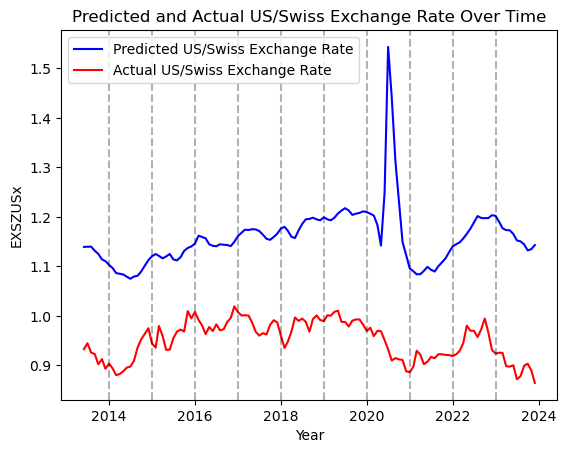

In [243]:
plt.plot(unscaled_preds_df3["EXSZUSx_preds"], color = "blue", label = "Predicted US/Swiss Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+3:], color = "red", label = "Actual US/Swiss Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/Swiss Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

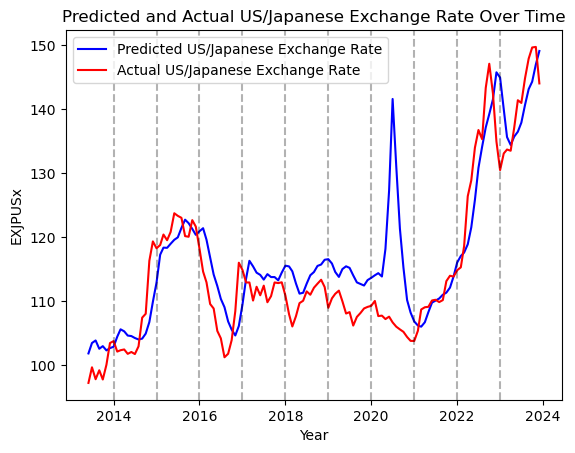

In [244]:
plt.plot(unscaled_preds_df3["EXJPUSx_preds"], color = "blue", label = "Predicted US/Japanese Exchange Rate")
plt.plot(urate_dollar_df["EXJPUSx"][VAL+3:], color = "red", label = "Actual US/Japanese Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXJPUSx")
plt.title("Predicted and Actual US/Japanese Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

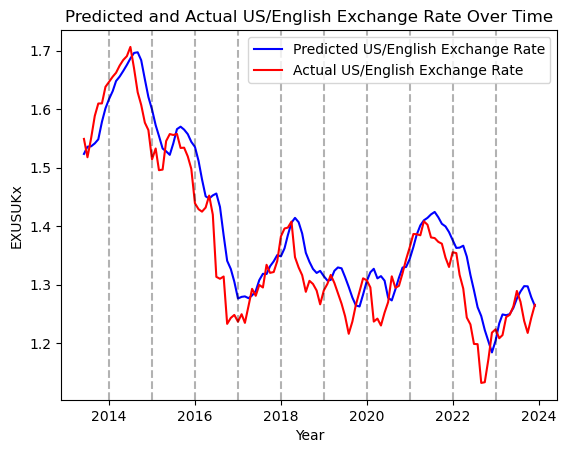

In [246]:
plt.plot(unscaled_preds_df3["EXUSUKx_preds"], color = "blue", label = "Predicted US/English Exchange Rate")
plt.plot(urate_dollar_df["EXUSUKx"][VAL+3:], color = "red", label = "Actual US/English Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXUSUKx")
plt.title("Predicted and Actual US/English Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

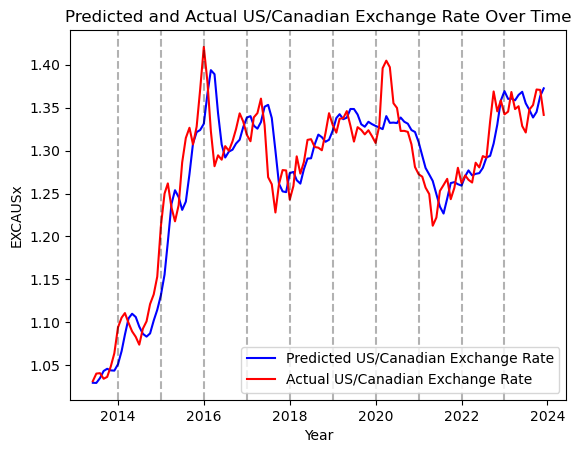

In [247]:
plt.plot(unscaled_preds_df3["EXCAUSx_preds"], color = "blue", label = "Predicted US/Canadian Exchange Rate")
plt.plot(urate_dollar_df["EXCAUSx"][VAL+3:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXCAUSx")
plt.title("Predicted and Actual US/Canadian Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

### RPI and M1 Money Stock

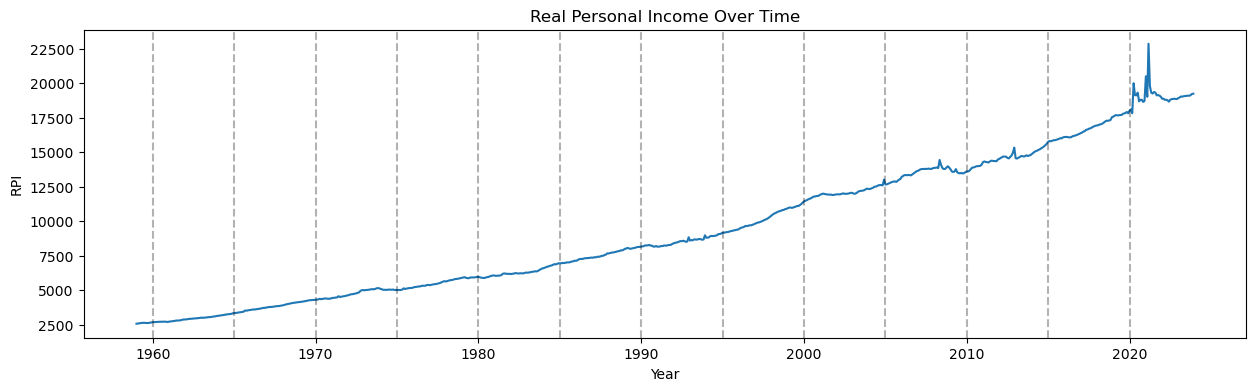

In [252]:
title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == "RPI", "description"].values[0]
plt.figure(figsize=(15,4))
plt.plot(fred_md["RPI"])
plt.title(f"{title_} Over Time")
plt.xlabel("Year")
plt.ylabel(f"RPI")
for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

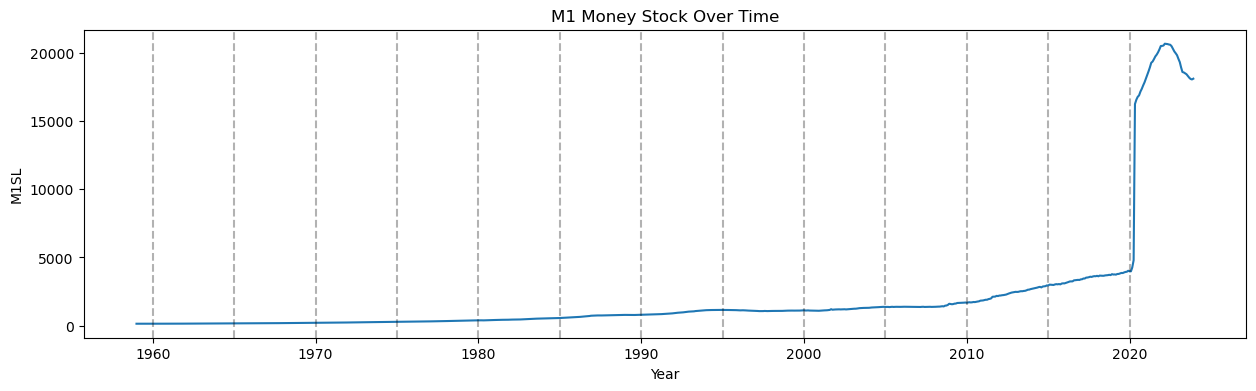

In [253]:
title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == "M1SL", "description"].values[0]
plt.figure(figsize=(15,4))
plt.plot(fred_md["M1SL"])
plt.title(f"{title_} Over Time")
plt.xlabel("Year")
plt.ylabel(f"M1SL")
for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [304]:
m1_rpi = fred_md[["RPI", "M1SL"]]
scaler4 = StandardScaler()
scaled_np4 = scaler4.fit_transform(m1_rpi.to_numpy())
scaled_df4 = pd.DataFrame(scaled_np4, columns = ["RPI", "M1SL"])
scaled_df4.index = urate_dollar_df.index
scaled_df4.tail()


,RPI,M1SL
sasdate,,
2023-08-01,1.972238,3.809722
2023-09-01,1.970259,3.778808
2023-10-01,1.979457,3.757511
2023-11-01,1.997052,3.749302
2023-12-01,2.000565,3.762320


In [288]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [293]:
x_train4, y_train4 = df_to_X_y(scaled_df4, 5)
x_train4_, x_val4, x_test4 = x_train4[:TRAIN], x_train4[TRAIN:VAL], x_train4[VAL:]
y_train4_, y_val4, y_test4 = y_train4[:TRAIN], y_train4[TRAIN:VAL], y_train4[VAL:]

In [321]:
def create_cnn4():
    cnn = models.Sequential()
    cnn.add(InputLayer((5, 2)))
    cnn.add(Conv1D(64, kernel_size = 2, activation="tanh"))
    cnn.add(Flatten())
    cnn.add(Dense(8, "relu"))
    cnn.add(Dense(1, "linear"))
    cnn.compile(optimizer='adam', loss='mse')
    return cnn

def create_gru4():
    gru = models.Sequential()
    gru.add(InputLayer((5, 2)))
    gru.add(GRU(64))
    gru.add(Dense(8, "relu"))
    gru.add(Dense(1, "linear"))
    gru.compile(optimizer='adam', loss='mse')
    return gru

def create_lstm4():
    lstm = models.Sequential()
    lstm.add(InputLayer((5, 2)))
    lstm.add(LSTM(64))
    lstm.add(Dense(8, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

def double_lstm():
    lstm = models.Sequential()
    lstm.add(InputLayer((5, 2)))
    lstm.add(LSTM(32, return_sequences = True))
    lstm.add(LSTM(64))
    lstm.add(Dense(8, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

In [322]:
cnn4 = create_cnn4()
gru4 = create_gru4()
lstm4 = create_lstm4()
double_lstm4 = double_lstm()

In [323]:
cnn4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
gru4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
lstm4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
double_lstm4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)

Epoch 1/15
25/25 [==============================] - 1s 10ms/step - loss: 0.4097 - val_loss: 0.3466
Epoch 2/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0532 - val_loss: 0.0171
Epoch 3/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 4/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 9.1110e-04
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 9.2131e-04
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 9.8721e-04
Epoch 8/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 9.0254e-04
Epoch 9/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 10/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 8.9281e-0

In [335]:
cnn4.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_53 (Conv1D)          (None, 4, 64)             320       
                                                                 
 flatten_52 (Flatten)        (None, 256)               0         
                                                                 
 dense_150 (Dense)           (None, 8)                 2056      
                                                                 
 dense_151 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


In [336]:
gru4.summary()

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                13056     
                                                                 
 dense_152 (Dense)           (None, 8)                 520       
                                                                 
 dense_153 (Dense)           (None, 1)                 9         
                                                                 
Total params: 13,585
Trainable params: 13,585
Non-trainable params: 0
_________________________________________________________________


In [337]:
lstm4.summary()

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_57 (LSTM)              (None, 64)                17152     
                                                                 
 dense_154 (Dense)           (None, 8)                 520       
                                                                 
 dense_155 (Dense)           (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [338]:
double_lstm4.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 5, 32)             4480      
                                                                 
 lstm_59 (LSTM)              (None, 64)                24832     
                                                                 
 dense_156 (Dense)           (None, 8)                 520       
                                                                 
 dense_157 (Dense)           (None, 1)                 9         
                                                                 
Total params: 29,841
Trainable params: 29,841
Non-trainable params: 0
_________________________________________________________________


In [324]:
cnn4_preds = cnn4.predict(x_test4)
gru4_preds = gru4.predict(x_test4)
lstm4_preds = lstm4.predict(x_test4)
double_lstm4_preds = double_lstm4.predict(x_test4)

4/4 [==============================] - 1s 4ms/step


In [325]:
preds_cnn_dict = {
    "CNN_Preds":cnn4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

preds_cnn_dict
unscaled_preds_cnn = scaler4.inverse_transform(pd.DataFrame(preds_cnn_dict).to_numpy())
unscaled_preds_df = pd.DataFrame(unscaled_preds_cnn, columns = ["CNN_Preds", "M1"])
unscaled_preds_df.index = fred_md.index[VAL+5:]

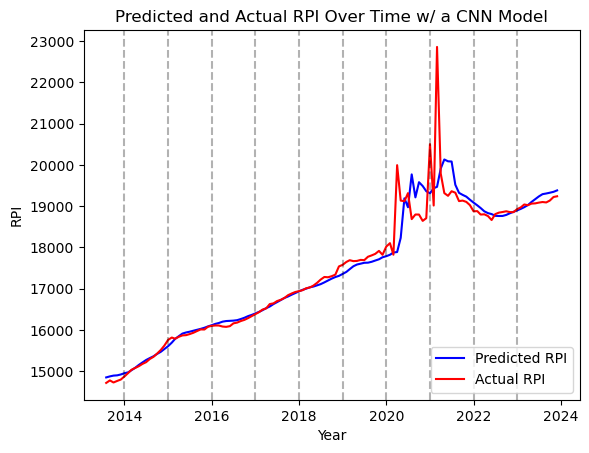

In [327]:
plt.plot(unscaled_preds_df["CNN_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a CNN Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [328]:
preds_gru_dict = {
    "GRU_Preds":gru4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_gru = scaler4.inverse_transform(pd.DataFrame(preds_gru_dict).to_numpy())
unscaled_preds_df2 = pd.DataFrame(unscaled_preds_gru, columns = ["GRU_Preds", "M1"])
unscaled_preds_df2.index = fred_md.index[VAL+5:]

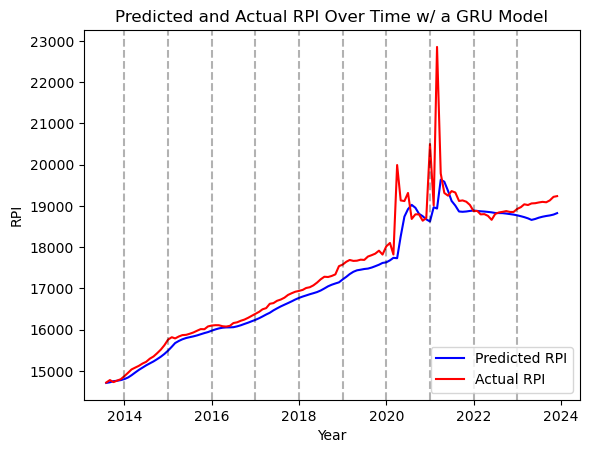

In [329]:
plt.plot(unscaled_preds_df2["GRU_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a GRU Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [332]:
preds_lstm_dict = {
    "LSTM_Preds":lstm4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_lstm = scaler4.inverse_transform(pd.DataFrame(preds_lstm_dict).to_numpy())
unscaled_preds_df3 = pd.DataFrame(unscaled_preds_lstm, columns = ["LSTM_Preds", "M1"])
unscaled_preds_df3.index = fred_md.index[VAL+5:]

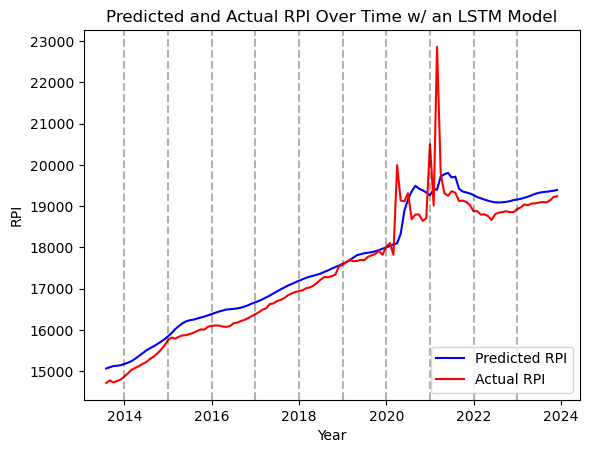

In [333]:
plt.plot(unscaled_preds_df3["LSTM_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ an LSTM Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [339]:
preds_double_lstm_dict = {
    "Double_LSTM_Preds":double_lstm4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_double_lstm = scaler4.inverse_transform(pd.DataFrame(preds_double_lstm_dict).to_numpy())
unscaled_preds_df4 = pd.DataFrame(unscaled_preds_double_lstm, columns = ["Double_LSTM_Preds", "M1"])
unscaled_preds_df4.index = fred_md.index[VAL+5:]

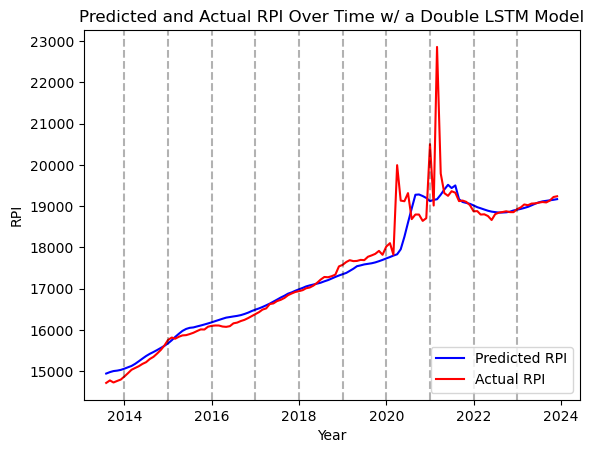

In [340]:
plt.plot(unscaled_preds_df4["Double_LSTM_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a Double LSTM Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [344]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(mean_absolute_percentage_error(unscaled_preds_df["CNN_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df2["GRU_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df3["LSTM_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df4["Double_LSTM_Preds"], fred_md["RPI"][VAL+5:]))

0.01025973734642818
0.013814390584421124
0.017658664897259264
0.01124501515916043
